In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter

# 사기

In [2]:
# 네이버 페이지 사기 크롤링
genre1 = []

for i in range(11):
    print(f'{i}페이지 분석중....')
    url1 = (f'https://search.naver.com/search.naver?display=15&f=&filetype=0&page={i+2}&query=%EC%82%AC%EA%B8%B0&research_url=&sm=tab_pge&start={i*15+1}&where=web')
    html1 = requests.get(url1)
    bs = BeautifulSoup(html1.text, 'lxml')
    bs2 = bs.find('div', {'class':'api_txt_lines'}).get_text()
    genre1.append(bs2)

0페이지 분석중....
1페이지 분석중....
2페이지 분석중....
3페이지 분석중....
4페이지 분석중....
5페이지 분석중....
6페이지 분석중....
7페이지 분석중....
8페이지 분석중....
9페이지 분석중....
10페이지 분석중....


In [3]:
print(genre1)

['사기(詐欺)는 사실을 오인시키는 등의 방법으로 남을 기망해서(속여서) 경제적 이득을 얻거나 다른 사람으로 하여금 얻게 하는 행위이다. 경우에 따라 민사상 책임이 부여되고, 후술할 사기죄로 처벌을 받을 수 있다.', "간편하게 거래가 가능한 중고 거래 시스템 이런 번개장터에도 단점은 존재했는데요, 그것 바로 '사기'에 대한 위험성입니다. 오늘은 모바일 중고거래 플랫폼 '번개장터'의 '사기... 그러다 보니 악의적인 의도를 가지고 돈만 받고 물건은 보내주지 않은 '사기'라는 일이 발생하기도 합니다. 중고 거래에서 사기를 당해 벽돌 받지 말자 (출처: 위키백과) 그렇다면... ", '사기꾼,사기꾼리스트,사기꾼목록,사기,사기당했어요,사기당했을때,사기대처법,중고,중고물품,중고거래,더치트,인터넷사기,보이스피싱,스미싱,메신저피싱,몸캠피싱,인터넷도박,성매매', '직업적(?)으로 사기를 치고 다니는 사람을 사기꾼이라고 부른다. 다른 범죄자들은 거의 대부분 -범(ex : 절도범, 강간범)이라고 부르거나 흉악범죄의 경우 -마(ex : 살인마)라고 부르는데 사기꾼만은 -꾼이라고 부른다. 절도꾼이나 살인꾼이란 말을 들어본 사람은 없을 것이다.', '단비 청소년 교양 왈 시리즈 3권. 고통과 수치 속에서 저작을 완성해, 끝내 역사의 아버지(歷史之父)라는 불멸의 이름을 얻은 사마천의 삶과 그가 남긴 <사기>의 몇몇 이야기를 선별해 옛사람들과 그들의 삶을...', '▲ 주요 포털 사이트에서도 아이템 사기를 당해 도와달라는 다수의 요청을 확인할 수 있다 (사진출처: 네이버 지식인) 즐기기 위해서 하는 게임, 하지만 억울한 일을 당하는 경우도 종종... 다양한 사례 중 대표적인 케이스라 할 수 있는 <아이템 거래 사기> <채팅 피해> <모바일게임 환불 대행 사기> 세 가지를 집중적으로 알아보는 시간을 마련했다. ▲ 한국콘텐츠진흥원... ', '아래 팁을 참고하여 신용 사기를 방지하고 의심스러운 이메일, 전화 또는 기타 메시지를 받는 경우 수행할 작업에 대해 알아봅니다.', '반성문 > 사

In [4]:
# 네이버 view
url2 = 'https://search.naver.com/search.naver?where=view&sm=tab_jum&query=%EC%82%AC%EA%B8%B0'
html2 = requests.get(url2)
bs3 = BeautifulSoup(html2.text, 'lxml')
bs4 = bs3.find_all('div', {'class':'api_txt_lines'})
bs4

[<div class="api_txt_lines dsc_txt">투자<mark>사기</mark> 고소 관련한 법적 대응은 많은 사람들이 자산가격의 폭등으로 인하여 은행 금융 상품에 투자하기... <mark>사기</mark>죄는 형법 제 347조에서 규정하고 있으며 인간을 기망하여 재물의 교부를 받거나 혹은 자산상의 이익을 취한...</div>,
 <div class="api_txt_lines dsc_txt"><mark>사기</mark>죄 고소 대응 방안은 비트코인 거래 회사 투자를 미끼로 삼아 100억원대의 <mark>사기</mark> 행위를 벌인 일당에게 실형과 집행유예 선고가 내려지게 되었다고 하였는데요. <mark>사기</mark>죄 고소로 재판에 넘겨진 A씨에게는 징역 3년을...</div>,
 <div class="api_txt_lines dsc_txt"><mark>사기</mark>민사소송 절차 진행 과정은 국내는 국제적으로 아이티 분야에서 인정받는 국가로 보고 있지만 옛날부터... 머리가 좋으면 <mark>사기</mark>도 잘 친다는 말이 있듯이 현재 당국은 강력범죄는 여러 나라에 비해 발생률이 현저하게...</div>,
 <div class="api_txt_lines dsc_txt">형법 제 347조 <mark>사기</mark>죄는 인간을 기망하여 재물의 교부를 받은 자 혹은 자산상의 이익을 취한 자에 한하여 10년 이하의 노역복무 또는 2천만원 이하의 벌금에 처한다고 하였습니다. 최근엔 투자<mark>사기</mark> 고소가 늘어나고 있는...</div>,
 <div class="api_txt_lines dsc_txt">해당 문제로 고소하는 사안을 살피게 된다면 전체 형사고소 사항 10건 중 7건도 <mark>사기</mark> 물의로 분류될 정도입니다. 그만큼 우리나라에서 흔히 볼 수 있는 불법행위가 바로 <mark>사기</mark>이고, 사안의 피해자 역시 너무나 많습니다....</div>,
 <div class="api_txt_lines d

In [5]:
bs4_list = []
for i in bs4:
    bs4_list.append(i.get_text())

In [6]:
print(bs4_list)

['투자사기 고소 관련한 법적 대응은 많은 사람들이 자산가격의 폭등으로 인하여 은행 금융 상품에 투자하기... 사기죄는 형법 제 347조에서 규정하고 있으며 인간을 기망하여 재물의 교부를 받거나 혹은 자산상의 이익을 취한...', '사기죄 고소 대응 방안은 비트코인 거래 회사 투자를 미끼로 삼아 100억원대의 사기 행위를 벌인 일당에게 실형과 집행유예 선고가 내려지게 되었다고 하였는데요. 사기죄 고소로 재판에 넘겨진 A씨에게는 징역 3년을...', '사기민사소송 절차 진행 과정은 국내는 국제적으로 아이티 분야에서 인정받는 국가로 보고 있지만 옛날부터... 머리가 좋으면 사기도 잘 친다는 말이 있듯이 현재 당국은 강력범죄는 여러 나라에 비해 발생률이 현저하게...', '형법 제 347조 사기죄는 인간을 기망하여 재물의 교부를 받은 자 혹은 자산상의 이익을 취한 자에 한하여 10년 이하의 노역복무 또는 2천만원 이하의 벌금에 처한다고 하였습니다. 최근엔 투자사기 고소가 늘어나고 있는...', '해당 문제로 고소하는 사안을 살피게 된다면 전체 형사고소 사항 10건 중 7건도 사기 물의로 분류될 정도입니다. 그만큼 우리나라에서 흔히 볼 수 있는 불법행위가 바로 사기이고, 사안의 피해자 역시 너무나 많습니다....', '사기죄 고소 전략과 해법은 사기죄는 사람을 기망하여 재물의 교부를 받거나 재산상의 이익을 취득하거나 제3자로 하여금 취득하게 함으로써 성립하는 범죄입니다. 기망행위의 상대방은 재산상의 피해자와 동일인일...', '사기죄고소 신고 후 처벌 위기라면 우리는 다른 사람과의 관계 속에서 때로는 믿음 하나만으로 자신의... 이처럼 사기죄는 사람을 기망하여 상대방의 착오 있는 의사를 이용하여 재물의 교부를 받거나 기타 재산상의...', '사기죄 고소 성립요건 이해를 바탕으로 살아가면서 누구나 한번은 조그만 거짓말이라도 뱉어본 경험을 갖고... 사기죄는 시간이 지날수록 다양한 수법으로 변화하고 있고 지능적으로 바뀌고 있다고 하였습니다. 나라의...', '금리가\xa

In [7]:
genre1.extend(bs4_list)

In [8]:
from konlpy.tag import Okt

okt = Okt()
noun_adj_list = []
for data in genre1:
    sentences_tag = okt.pos(data)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            noun_adj_list.append(word)

In [9]:
noun_adj_list
counts = Counter(noun_adj_list)
tags = counts.most_common(50)
tags

[('사기', 55),
 ('사기죄', 20),
 ('수', 13),
 ('고소', 13),
 ('투자', 10),
 ('거래', 9),
 ('사람', 8),
 ('사기꾼', 8),
 ('사건', 7),
 ('기', 6),
 ('중고', 6),
 ('피해', 6),
 ('친환경', 6),
 ('구실', 6),
 ('국민', 6),
 ('값', 6),
 ('재생에너지', 6),
 ('전세', 6),
 ('다른', 5),
 ('말', 5),
 ('것', 5),
 ('그', 5),
 ('상의', 5),
 ('성립', 5),
 ('깡통', 5),
 ('부동산', 5),
 ('등', 4),
 ('경우', 4),
 ('가지', 4),
 ('중', 4),
 ('시간', 4),
 ('한국', 4),
 ('회사', 4),
 ('부도', 4),
 ('이', 4),
 ('폰', 4),
 ('정부', 4),
 ('대응', 4),
 ('자산', 4),
 ('제', 4),
 ('재물', 4),
 ('교부', 4),
 ('진행', 4),
 ('사안', 4),
 ('피해자', 4),
 ('세금', 4),
 ('접근', 4),
 ('인증', 4),
 ('방법', 3),
 ('속', 3)]

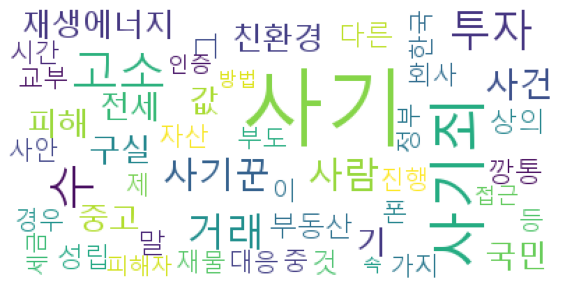

In [10]:
# WordCloud를 생성한다.
from wordcloud import WordCloud
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud1 = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud1)
plt.show()

# 횡령

In [11]:
# 네이버 페이지 횡령 크롤링
genre2 = []

for i in range(11):
    print(f'{i}페이지 분석중....')
    url1 = (f'https://search.naver.com/search.naver?display=15&f=&filetype=0&page={i+2}&query=%ED%9A%A1%EB%A0%B9&research_url=&sm=tab_pge&start={i*15+1}&where=web')
    html1 = requests.get(url1)
    bs3 = BeautifulSoup(html1.text, 'lxml')
    bs5 = bs3.find('div', {'class':'api_txt_lines'}).get_text()
    genre2.append(bs5)

0페이지 분석중....
1페이지 분석중....
2페이지 분석중....
3페이지 분석중....
4페이지 분석중....
5페이지 분석중....
6페이지 분석중....
7페이지 분석중....
8페이지 분석중....
9페이지 분석중....
10페이지 분석중....


In [12]:
print(genre2)

['횡령(橫領 / embezzlement)은 타인의 재물을 보관하는 자가 그 타인의 재물을 유용하거나 반환을 거부하는 행위이다. 흔히 빼돌리기라는 표현을 사용하며, 속된 말로 삥땅, 슈킹, 긴빠이라고도 부른다.', '2021년오스템임플란트의 자금관리 팀장인 직원 이은식 (45세, 1977년생)이 자본금의 108.18%에 달하는 2,215억 원의 거액을 빼돌린 사건이다.', '횡령, 폭행, 모욕, 감금, 명예훼손, 문서위조, 강제추행…. 2013년 1월 1일에서 올 7월 29일 사이...', '박수홍의 친형 박진홍이 박수홍의 출연료를 지급하지 않고 추정 100억 원 이상의 재산을 빼돌린 횡령 의혹 사건을 서술한 문서다.', '회삿돈 2천215억원을 횡령한 오스템임플란트 직원 이모(45)씨의 아버지(69)가 실종돼 경찰이 수색 ...', "'700억 횡령' 우리은행도 금감원도 몰랐다, 금감원, 검사 결과 발표 직원, 8년간 697.3억 빼돌려 은행선 13개월 무단결근도 몰라 직인 도용·공사문서 수차례 위조 우리銀 내부통제 작동 안해 적발 못한 '금감원 책임론'도 제기 당국, 법률검토 후 제재수위 결정", '614억원을 횡령한 혐의로 고소된 우리은행 직원이 50억원을 더 빼돌렸던 것이 금융감독원 조사 ...', '오스템임플란트 8년 전 100억대 횡령사건 또 있었다 오스템임플란트 1880억원 횡령한 사실이 발각되면서 코스닥시장에서 주식 거래가 중지된 오스템임플란트가 8년 전에도 대표이사의 횡령혐의로 거래중지됐던 사실 등이 회자되고 있다. 4일 금융투자업계에 따르면 오스템임플란', '`역대급 횡령` 오스템임플란트, 거래정지에도 시총 순위 껑충…왜?, 작성자-이가람, 요약-역대급 횡령 사건으로 주식 거래가 정지된 오스템임플란트의 시가총액 순위가 상승했다. 최근 폭락장세 속에서 다른 종목들의 주가가 하락하면서 반사이익을 본 것이다. 29일 한국거래소에 따르면 현재 오스템임플란트의 주가는 주당 14만27', '모든 횡령과 자산관리는 본인이 했다고 주장하고 있다. 친족상도례

In [13]:
# 네이버 view 횡령
url3 = 'https://search.naver.com/search.naver?where=view&sm=tab_jum&query=%ED%9A%A1%EB%A0%B9'
html3 = requests.get(url3)
bs6 = BeautifulSoup(html3.text, 'lxml')
bs7 = bs6.find_all('div', {'class':'api_txt_lines'})
bs7

[<div class="api_txt_lines dsc_txt"><mark>횡령</mark>죄처벌에도움되는 <mark>횡령</mark>변호사(<mark>횡령</mark>죄변호사,<mark>횡령</mark>전문변호사)를만나<mark>횡령</mark>죄(배임<mark>횡령</mark>,<mark>횡령</mark>배임,배임<mark>횡령</mark>죄,업무상<mark>횡령</mark>죄,업무상<mark>횡령</mark>,사기<mark>횡령</mark>,배임죄,공금<mark>횡령</mark>죄,<mark>횡령</mark>)사건을해결해보시기바랍니다...</div>,
 <div class="api_txt_lines dsc_txt">실수로 비용 처리한 내역을 누락하더라도 다시 정리하고수습한다면 법적 문제가 되지 않을 수 있지만 임의로 개인의 이익을 위해 공금을 사용한다면 <mark>횡령</mark>죄 이상의 업무상 <mark>횡령</mark>죄로 처벌받을 수 있습니다....</div>,
 <div class="api_txt_lines dsc_txt">업무상<mark>횡령</mark> 혐의 기준은 타인의 재물 보관을 하는 자가 타인의 재물을 반환 거부 또는 유용하는 행위를 <mark>횡령</mark>이라고 하였는데요. <mark>횡령</mark> 사건의 주체는 타인 재물 보관을 하는 이로서 사실상 지배 중에 있거나 지배처분이...</div>,
 <div class="api_txt_lines dsc_txt">오늘은 이러한 상황과 연관된 <mark>횡령</mark>배임 처벌수위를 살펴보는 시간을 가질 것이라 하였습니다. 먼저 본 죄와... 이와 관련해서 <mark>횡령</mark>배임 처벌수위로 위기를 마주하게 되면 혐의를 방어하는 것이 굉장히 어려운 일이라...</div>,
 <div class="api_txt_lines dsc_txt">업무상<mark>횡령</mark> 처벌 일례를 알아보면 본인이 타인의 재물을 보관하는 업무를 하고 있었는데 이를 <mark>횡령</mark>

In [14]:
bs7_list = []
for i in bs7:
    bs7_list.append(i.get_text())

In [15]:
print(bs7_list)

['횡령죄처벌에도움되는 횡령변호사(횡령죄변호사,횡령전문변호사)를만나횡령죄(배임횡령,횡령배임,배임횡령죄,업무상횡령죄,업무상횡령,사기횡령,배임죄,공금횡령죄,횡령)사건을해결해보시기바랍니다...', '실수로 비용 처리한 내역을 누락하더라도 다시 정리하고수습한다면 법적 문제가 되지 않을 수 있지만 임의로 개인의 이익을 위해 공금을 사용한다면 횡령죄 이상의 업무상 횡령죄로 처벌받을 수 있습니다....', '업무상횡령 혐의 기준은 타인의 재물 보관을 하는 자가 타인의 재물을 반환 거부 또는 유용하는 행위를 횡령이라고 하였는데요. 횡령 사건의 주체는 타인 재물 보관을 하는 이로서 사실상 지배 중에 있거나 지배처분이...', '오늘은 이러한 상황과 연관된 횡령배임 처벌수위를 살펴보는 시간을 가질 것이라 하였습니다. 먼저 본 죄와... 이와 관련해서 횡령배임 처벌수위로 위기를 마주하게 되면 혐의를 방어하는 것이 굉장히 어려운 일이라...', '업무상횡령 처벌 일례를 알아보면 본인이 타인의 재물을 보관하는 업무를 하고 있었는데 이를 횡령하거나 반환을 거부하였다면 업무상횡령 처벌을 받는 것으로 규정하였습니다. 타인의 재물에 대해 반환을 거부하는 것...', '횡령배임죄 처벌 수위는 A씨는 40대 남성으로 장기간 은행에서 근무를 했는데요. D씨는 은행에 단골고객으로... 얻었다면 횡령 배임죄 의 해당하는 구성요건을 갖추기 때문에 업무상 배임죄에 해당하게 되는 것인데요....', '업무상횡령 처벌 신임관계 위반했다면 재산 손실의 결과를 불러오는 범죄적인 사건은 정말 민감한... 특히 업무상의 횡령은 특정적 사무에 대해 일반 사람들보다 높은 신임관계가 형성되어 있는 상황을 이용한 것입니다....', '횡령죄는 타인의 재물을 보관하는 사람이 재물을 횡령하거나 반환을 거부하는 범죄이다. 횡령죄로 연루되는 경우 무거운 수위의 처분이 내려지는데 단순횡령이 아닌 공금횡령인 경우 10년이하의 징역 또는...', '횡령죄처벌은 횡령죄변호사에게 배임, 배임횡령죄, 배임증재, 배임수재죄,기획부동산사기,

In [16]:
genre2.extend(bs7_list)

In [17]:
from konlpy.tag import Okt

okt = Okt()
noun_adj_list = []
for data in genre2:
    sentences_tag = okt.pos(data)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            noun_adj_list.append(word)

In [18]:
noun_adj_list
counts = Counter(noun_adj_list)
tags = counts.most_common(50)
tags

[('횡령', 88),
 ('업무', 37),
 ('처벌', 26),
 ('횡령죄', 20),
 ('것', 19),
 ('혐의', 15),
 ('사건', 12),
 ('배임', 11),
 ('공금', 11),
 ('씨', 10),
 ('재물', 9),
 ('박수홍', 9),
 ('타인', 8),
 ('스템', 8),
 ('등', 8),
 ('수', 8),
 ('돈', 8),
 ('그', 7),
 ('임플란트', 7),
 ('이', 6),
 ('형사', 6),
 ('변호사', 6),
 ('보관', 5),
 ('반환', 5),
 ('거부', 5),
 ('속', 5),
 ('관리', 5),
 ('직원', 5),
 ('달', 5),
 ('원', 5),
 ('친형', 5),
 ('가중', 5),
 ('관련', 5),
 ('경우', 5),
 ('금액', 5),
 ('사용', 4),
 ('자금', 4),
 ('세', 4),
 ('빼', 4),
 ('의혹', 4),
 ('책임', 4),
 ('수위', 4),
 ('고소', 4),
 ('전', 4),
 ('사실', 4),
 ('거래', 4),
 ('본인', 4),
 ('악용', 4),
 ('박씨', 4),
 ('특정', 4)]

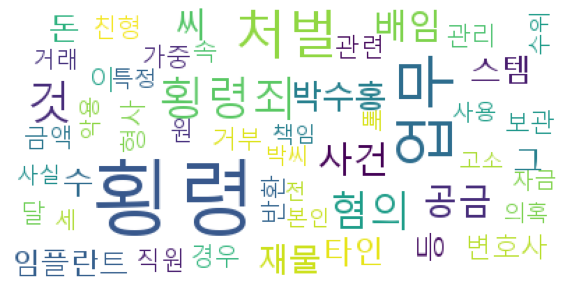

In [19]:
# WordCloud를 생성한다.
from wordcloud import WordCloud
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud1 = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud1)
plt.show()

In [20]:
import pandas as pd